# Báo cáo Project 
Nhập môn trí tuệ nhân tạo 154016 - nhóm 14  

## 1. Thông tin chung 
Xây dựng một mô hình trí tuệ nhân tạo sử dụng những công cụ lập trình cơ bản. Project hướng đến việc trau dồi cho sinh viên một nền tảng kiến thức vững vàng về lĩnh vực trí tuệ nhân tạo, đồng thời rèn luyện kĩ năng lập trình python thông qua việc biểu diễn dữ liệu và lập trình hàm huấn luyện và đánh giá

### Thành viên: 
- Phạm Văn Thanh 20220042
- Nguyễn Nam 20220037
- Nguyễn Hữu Huy 20220028
- Vũ Thành Đạt 20224952
- Tạ Đăng Dương 20224969

### Lịch thực hiện
- W02: Đăng ký nhóm (Đã xác nhận nhóm đăng ký hoặc phân công 17/9)
- W03: Đề xuất project (22/9 - các thành viên trong nhóm bắt đầu trao đổi, thực hiện project)
- W09: Báo cáo tiến độ giữa kỳ (2/11)
- W15: Hoàn thành và gửi báo cáo project (14/12)
- W16-17: Trình bày project, Q&A

## 2. Đề xuất đề tài

### Bài toán: Nhận diện chữ số trong tập dữ liệu MNIST. 
- Tập dữ liệu MNIST (Modified National Institute of Standards and Technology) chứa $70,000$ hình ảnh grayscale (mức xám) có kích thước $28\times28$ pixels, trong đó có $60,000$ hình ảnh dùng để huấn luyện và $10,000$ hình ảnh để kiểm tra. Mỗi hình ảnh trong tập dữ liệu biểu diễn một chữ số từ $0$ đến $9$.
- Mục tiêu của project là xây dựng một mô hình có khả năng phân loại các chữ số viết tay từ $0$ đến $9$ dựa trên hình ảnh đầu vào.

### Phương pháp
Phương pháp K-Nearest Neighbors (KNN) là một thuật toán học máy dựa trên nguyên tắc "tương tự gần nhất", thường được sử dụng cho các bài toán phân loại. KNN thuộc nhóm các thuật toán không tham số (non-parametric) và hoạt động theo cách rất đơn giản nhưng hiệu quả khi áp dụng cho các bài toán với dữ liệu có tính tương đồng rõ ràng.   \ 

**Ý tưởng chính của KNN:**
- Không tồn tại quá trình huấn luận như các thuật toán machine learning khác
- Với mỗi điểm dữ liệu cần dự đoán, thuật toán sẽ tìm K điểm gần nhất (_K nearest neighbors_) trong tập dữ liệu huấn luyện thông qua một hàm khoảng cách (_Euclid, Mahattan,..._) 
- Nhãn của điểm dữ liệu cần dự đoán sẽ được tính toán dựa trên các láng giềng thông qua một quá trình biểu quyết (có thể có trọng số với mỗi biểu quyết)

### Phân công công việc 
1. Chuẩn hóa dữ liệu  - Huy, Thanh
2. Tối ưu dữ liệu đầu vào - Huy
3. Xây dựng hàm khoảng cách - Huy, Thanh
4. Xây dựng hàm dự đoán - Dương, Đạt, Huy, Thanh
5. Đánh giá mô hình, lựa chọn tham số - Nam
6. Tối ưu hàm tính khoảng cách - Dương
7. Tối ưu hàm dự đoán - Đạt
8. Viết báo cáo - Nam

Phần trăm công việc thực viện của từng thành viên: 
| Dương | Đạt | Huy | Nam | Thanh | 
|-------|-----|-----|-----|-------|
| $20\%$ | $20\%$ | $20\%$ | $20\%$ | $20\%$ | 

## Tiến độ giữa kỳ 
Project đã xây dựng được mô hình hoàn toàn bằng python cùng thư viện numpy với độ chính xác cao trên tập kiểm tra $\left(97\% \right)$ . Tuy nhiên, thời gian tính toán mô hình và kích thước bộ nhớ lưu trữ vẫn là một vấn đề trở ngại

### Mục lục 
- [Import thư viện, download dữ liệu](###import-thư-viện-và-download-dữ-liệu)
- [Chuẩn hóa dữ liệu](###chuẩn-hóa-dữ-liệu)
- [Xây dựng hàm khoảng cách](###xây-dựng-hàm-khoảng-cách)
- [Đánh giá mô hình và lựa chọn tham số](###đánh-giá-mô-hình-và-lựa-chọn-tham-số)

### Import thư viện và download dữ liệu 

In [ ]:
import numpy as np   
print(np.__version__)

1.23.0


Thông số phiên bản: 
- Python 3.9.18 
- NumPy 1.23 
- CuPy 9.1.0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [13]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [16]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#### Visualize data

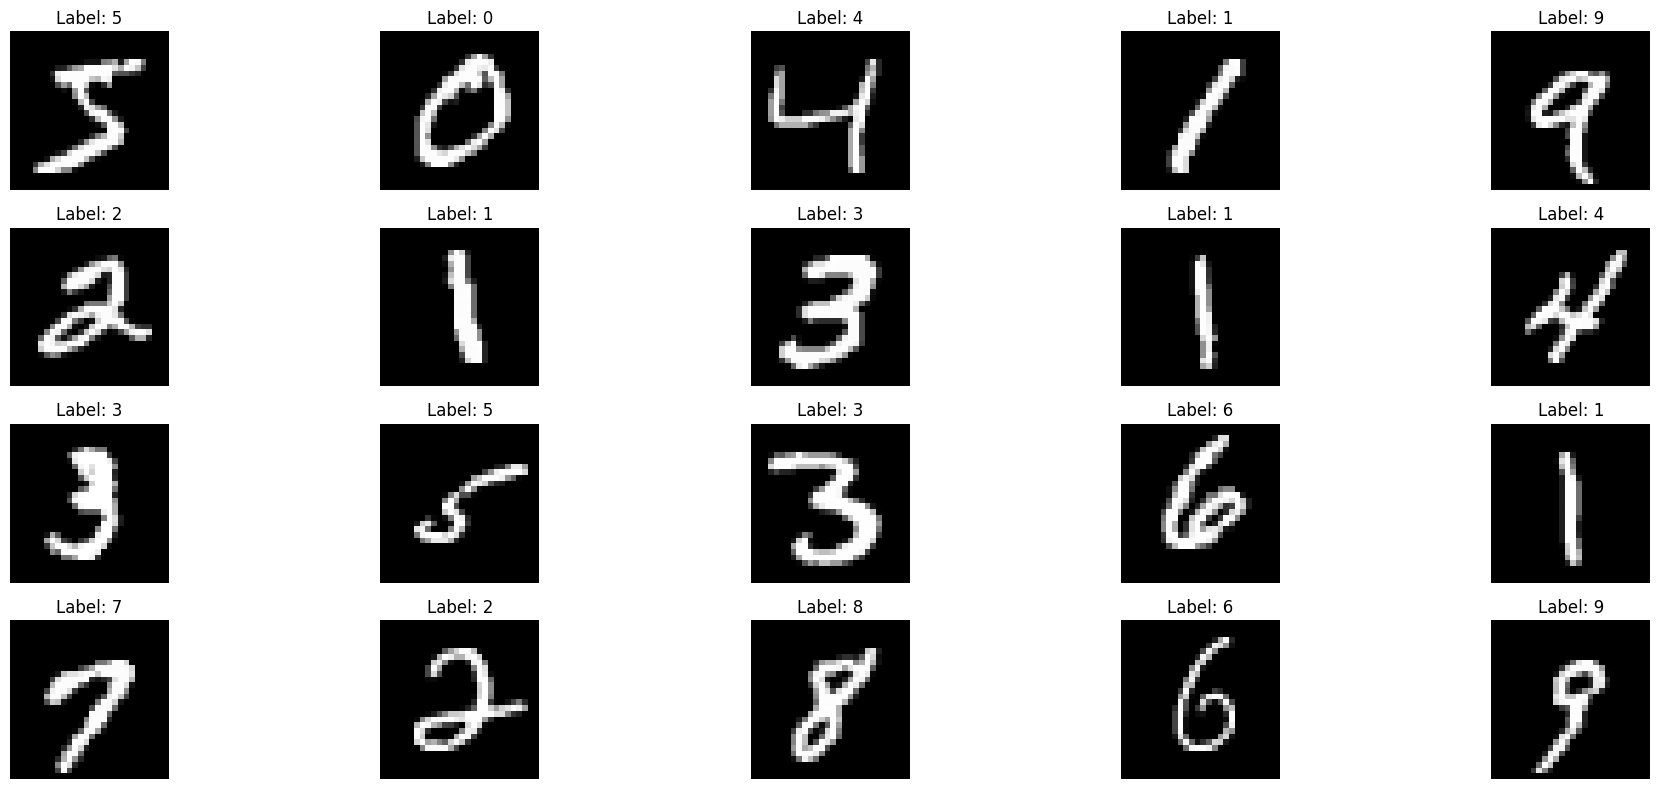

In [17]:
num_samples_to_display = 20

plt.figure(figsize=(20, 8))  
for i in range(num_samples_to_display):
    plt.subplot(4, 5, i + 1)  
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')  
    plt.title(f"Label: {y_train[i]}")  
    plt.axis('off')  
plt.tight_layout()  
plt.show()

### Tiền xử lý dữ liệu

In [44]:
class PreProcessor:
    def __init__(self, data):
        self.data = data
    
    def flatten(self) : 
        return self.data.reshape(self.data.shape[0],-1)

    def min_max_scale(self, scale_range=(0, 1)):
        min_val, max_val = scale_range
        data_flatten = self.flatten()
        scaled_data = (data_flatten / 255.0) * (max_val - min_val) + min_val
        return scaled_data

    def z_score_normalize(self):
        data_flatten = self.flatten()
        mean = np.mean(data_flatten, axis=0)
        std = np.std(data_flatten, axis=0)
        normalized_data = (data_flatten - mean) / (std + 1e-8)  # avoid division by zero
        return normalized_data

In [45]:
X_train_class = PreProcessor(X_train)
X_test_class = PreProcessor(X_test)

Chuyển dữ liệu về dạng 2 chiều, mỗi hàng là một điểm dữ liệu có số chiều là $28\times28$

**Cách 1:** mỗi điểm dữ liệu sẽ chia cho 255 để các phần tử thuộc khoảng $(0,1)$

In [46]:
X_train_2d_v1 = X_train_class.min_max_scale()
X_test_2d_v1 = X_test_class.min_max_scale() 

**Cách 2:** Chuẩn hóa _Z-score_

In [47]:
X_train_2d_v2 = X_train_class.z_score_normalize()
X_test_2d_v2 = X_test_class.z_score_normalize()

### Xây dựng hàm khoảng cách

#### Hàm khoảng cách giữa 2 điểm dữ liệu  
Với hai điểm dữ liệu $\mathbf{x} = \left(x_1, x_2,... x_n \right)$ và $\mathbf{y} = \left(y_1, y_2, ... y_n \right)$, ta định nghĩa các hàm khoảng cách sau: 
- Euclidean distance: 
$$ \|\mathbf{x} - \mathbf{y} \|_2 = \sqrt{\sum_{i=1}^{n} \left(x_i - y_i\right)^2 }$$ 
- Mahattan distance: 
$$ \| \mathbf{x} - \mathbf{y} \|_1 = \sum_{i=1}^{n} \left|x_i - y_i\right|^2   $$ 
- Minkowski distance: 
$$ D_p\left(\mathbf{x}, \mathbf{y}\right) = \left(\sum_{i=1}^{n} \left|x_i - y_i\right|^p\right)^{\dfrac{1}{p}}$$

In [51]:
v1 = np.array([1,2,3,4,5])
v2 = np.array([[1,2,3],
               [4,5,6]])

In [80]:
class DistanceMetric:
    def euclidean(v1, v2):
        if(v1.ndim == 1):
            v1_square = np.sum(v1**2)
            v2_square = np.sum(v2**2)
            v1_v2 = np.dot(v1, v2.T)
            return np.sqrt(v1_square + v2_square - 2*v1_v2)
        elif v1.ndim == 2:
            v1_square = np.sum(v1**2, axis=1).reshape(-1, 1)
            if (v2.ndim == 1):
                v2_square = v2**2
                v2_square = v2_square.reshape(1,-1)
            else: 
                v2_square = np.sum(v2**2, axis = 1)
                v2_square = np.sum(v2**2, axis=1).reshape(1, -1)
            cross_term = np.dot(v1, v2.T)
            distances = np.sqrt(v1_square - 2 * cross_term + v2_square)
            return distances

    # Manhattan distance (l1 norm)
    def manhattan( v1, v2):
        if(v1.ndim == 1):
            return np.sum(np.abs(v1-v2))
        elif v1.ndim == 2:
            v1_square = np.sum(v2**2, axis = 1)
            if (v2.ndim == 1):
                return np.sum(np.abs(v1-v2))
            else: 
                print("Invalid type!")
        
        
    # Minkowski distance (lp norm)
    def minkowski( v1, v2, p=2):
        return (np.sum(np.abs(v1-v2)**p))**(1/p)

### Xây dựng hàm dự đoán

#### Hàm biểu quyết 
Với các điểm dữ liệu $x_{i_1}, x_{i_2},... x_{i_k}$ được chọn làm láng giềng của điểm dữ liệu $x$, ta xây dựng cách xác định nhãn của $x$ như sau: 
- _Major voting:_
Mọi điểm dữ liệu đều có quyền biểu quyết ngang nhau
 $$label(x) = \arg \max_i{ \{\text{ số các điểm dữ liệu có nhãn $i$ }\}}$$
- _Weghted voting:_ Quyền biểu quyết của các điểm dữ liệu sẽ bị ảnh hưởng bởi độ gần của điểm dữ liệu đó với điểm cần dự đoán
$$ label(x) = \arg \max_i{\sum_{\text{ $p$ có nhãn $i$}} \dfrac{1}{distance(p, x)}}$$

In [87]:
class VotingMetric: 
    def major_voting(dedicates, k, number_of_classes):
        # dedicates: list of tuples (distance, label)
        votes = np.zeros(number_of_classes)
        for i in range(k):
            votes[dedicates[i][1]] += 1
        return np.argmax(votes)

    def weighted_voting(dedicates, k, number_of_classes):
        # dedicates: list of tuples (distance, label)
        votes = np.zeros(number_of_classes)
        for i in range(k):
            votes[dedicates[i][1]] += 1 / (dedicates[i][0] + 1e-10)
        return np.argmax(votes)

#### Dự đoán cho từng điểm dữ liệu

In [65]:
class KNN:
    def __init__(self, k, distance_metric, weights):
        self.k = k 
        self.distance_funct = distance_metric
        self.weights = weights
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
    def predict(self,X, number_of_classes):
        max_dist = float('inf')
        idx_max = 0
        dedicates = [(max_dist, -1)]*self.k

        # find neighbors
        distances = self.distance_funct(self.X_train, X)
        # Find the k nearest neighbors
        k_nearest_indices = np.argpartition(distances, self.k)[:self.k]
        dedicates = y_train[k_nearest_indices]
        y_pred = self.weights(dedicates, self.k, number_of_classes)
        return y_pred

#### Dự đoán cho cả tập dữ liệu

In [ ]:
# def KNN_predict(X, X_train, y_train, k = 5, number_of_classes = 10, distance_funct = euclidean, weights = major_voting):
#     y_pred = cp.zeros((X.shape[0], 1))
    
#     for i in range(X.shape[0]):
#         print(f"find label of { i} th point")
#         y_pred[i] = KNN_predict_point(X[i], X_train, y_train, k, number_of_classes, distance_funct, weights)
#     return y_pred

### Mô hình hóa 
**[Chưa làm xong]**, chờ Huy gánh 

In [ ]:
class DistanceMetrics:
    @staticmethod
    def euclidean(x, y):
        return np.sqrt(np.sum((x - y) ** 2))

    @staticmethod
    def manhattan(x, y):
        return np.sum(np.abs(x - y))

    @staticmethod
    def minkowski(x, y, p=3):
        return np.sum(np.abs(x - y) ** p) ** (1 / p)

### Kiểm tra trên tập test

#### Kiểm tra trên một mẫu dữ liệu nhỏ được chọn ngẫu nhiên

In [88]:
KNN_classifier = KNN(5, DistanceMetric.euclidean, VotingMetric.major_voting)
KNN_classifier.fit(X_train_2d_v1,y_train)

In [ ]:
y_pred_0 = KNN_classifier.predict(X_train_2d_v1[0], 10)
print(y_pred_0)

ValueError: operands could not be broadcast together with shapes (60000,) (1,784) 

In [89]:
num_samples = 200
# Chọn ngẫu nhiên 200 chỉ số từ tập kiểm tra
random_indices = cp.random.choice(len(X_test), size=num_samples, replace=False)
# Lấy các điểm dữ liệu tương ứng với các chỉ số đã chọn
X_test_sampled = X_test_2d_v1[300:500]
y_test_sampled = y_test[300:500]
print("Test")
y_pred = KNN_classifier.predict(X_test_sampled, 10)


Test


In [90]:
type(y_pred)

numpy.int64

### Đánh giá mô hình và lựa chọn tham số

|Chuẩn hóa dữ liệu|Số láng giềng|Hàm khoảng cách| Hàm biểu quyết | Số lượng mẫu dự đoán | Độ chính xác| 
|-----------------|--|---------------|----------------|-------------|---------------|
|Chia 255 | 5 | Euclidean | major_voting | 200 |96.5% | 
|Z-score | 5 | Euclidean | major_voting | 200 | 96.5%| 
|Chia 255 | 5 | Mahattan | major_voting | 200 |96% | 
|Z-score | 5 | Mahattan | major_voting | 200 |96.5% | 
|Chia 255 | 7 | Mahattan | major_voting | 200 | 96.5%| 
|Z-score | 7 | Mahattan | major_voting | 200 |95% | 

Nhận xét: 
- Sử dụng các chuẩn hóa dữ liệu bằng cách chia cho 255 cho kết quả tốt hơn hoặc bằng cách chuẩn hóa `Z-score`.
- Việc sử dụng khoảng cách `Mahattan` cho kết quả sớm hơn so với hàm `Euclidean`. Điều này xảy ra do quá trình tính toán của hàm `Euclidean` phức tạp hơn. 
- Thời gian tính toán vẫn là một vấn đề lớn. Khi chạy trên máy local với RAM 8GB và CPU AMD Ryzen 5, kết quả chạy 200 điểm dữ liệu kiểm tra mất khoảng 1m40s

Với bộ dữ liệu chỉ 200 điểm và không có nhiều sai khác về độ chính xác, chúng tôi cho rằng chưa thể đánh giá chính xác các mô hình. Do đó, yêu cầu đặt ra là cần chạy đủ 10000 bộ dữ liệu trong tập test để có đánh giá đầy đủ về tính chính xác của mô hình  

Ngoài ra, các hàm số tính khoảng cách cũng cần được tối ưu. Hàm `Minkowski` có độ phức tạp cao hơn hai hàm `Euclidean` và `Mahattan` trên với (`p` khác 1, 2). Do đó, việc dùng hàm `minkowski` sẽ không cho kết quả với độ phức tạp về thời gian tốt hơn hai hàm trên 

Một vấn đề khác cần lưu ý là GPU. NumPy không hỗ trợ chạy trên GPU. Sử dụng CuPy thay thế có thể sẽ đem tới hiệu năng tính toán tốt hơn

#### Kiểm tra trên cả tập test

In [91]:
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}" )
print(f"KNN Classification report: {classification_report(y_test, y_pred)}") 

InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got 0 instead.